# Testing the luseepy integration

The "Sun" object can be used to either calculate the Sun trajectory based on the time interval, or
read previously produced data from a file. Added a couple of validation plots.

In [1]:
# Imports and utility

# Jupyter magic for autoreload:
%reload_ext autoreload
%autoreload 2

# Test sun trajectory calculation at runtime, NB. may take long!

import sys
import numpy as np
import matplotlib.pyplot as plt
import lusee
from   lusee import Observation

# import nav
from nav import * # includes luseepy
# ----------------------------------------------------
print("Path:")
print("-------------------------------------")
for path_part in sys.path:
    if path_part!='': print(f'''{path_part}''')
print("-------------------------------------")
print(f'''lusee version: {lusee.__version__}''')



Path:
-------------------------------------
/home/maxim/projects/lusee/opsim/notebooks
/home/maxim/projects/lusee/luseepy
/home/maxim/projects/lusee/opsim
/home/maxim/.virtualenvs/lusee/lib/python3.10/site-packages/backports
/usr/local/lib/python310.zip
/usr/local/lib/python3.10
/usr/local/lib/python3.10/lib-dynload
/home/maxim/.virtualenvs/lusee/lib/python3.10/site-packages
/home/maxim/.virtualenvs/lusee/lib/python3.10/site-packages/backports.lzma-0.0.14-py3.10-linux-x86_64.egg
-------------------------------------
lusee version: 1.2-dev


In [2]:
# Basic test of the Observation object
interval = "2025-02-10 00:00:00 to 2025-02-11 23:45:00"
o = Observation(interval)

tuple_test = ("2025-02-10 00:00:00", "2025-02-11 23:45:00")
o_test = Observation(tuple_test, deltaT_sec = 100)

print(f'''time: {o_test.time}''')
print(f'''deltaT_sec: {o_test.deltaT_sec}''')
print(f'''lun_height_m: {o_test.lun_height_m}''')
print(f'''lun_lun_long_deg: {o_test.lun_long_deg}''')
print(f'''lun_lun_lat_deg: {o_test.lun_lat_deg}''')


time: ('2025-02-10 00:00:00', '2025-02-11 23:45:00')
deltaT_sec: 100
lun_height_m: 0
lun_lun_long_deg: 182.258
lun_lun_lat_deg: -23.814



---

### Calculate or read the Sun trajectory in the sky

In the two cells below, either calculate from scratch, or read data calculated previously.


In [3]:
# Calculate the trajectory at runtime

interval = "2025-02-10 00:00:00 to 2025-02-26 23:45:00"
mySun = Sun()
mySun.calculate(interval)


In [ ]:
# Read the prefab data on sun trajectory
import os
from nav import Sun
print('Current directory:', os.getcwd())

mySun = Sun()

cachefile = '../data/2025-02-04_03-07.npy'
mySun.read_trajectory(cachefile)
print(f'''Number of points read from the file {cachefile}: {mySun.N}''')


---

### Plot

Regardless of whether it was calculated or read from a file, we can check the data with some graphics

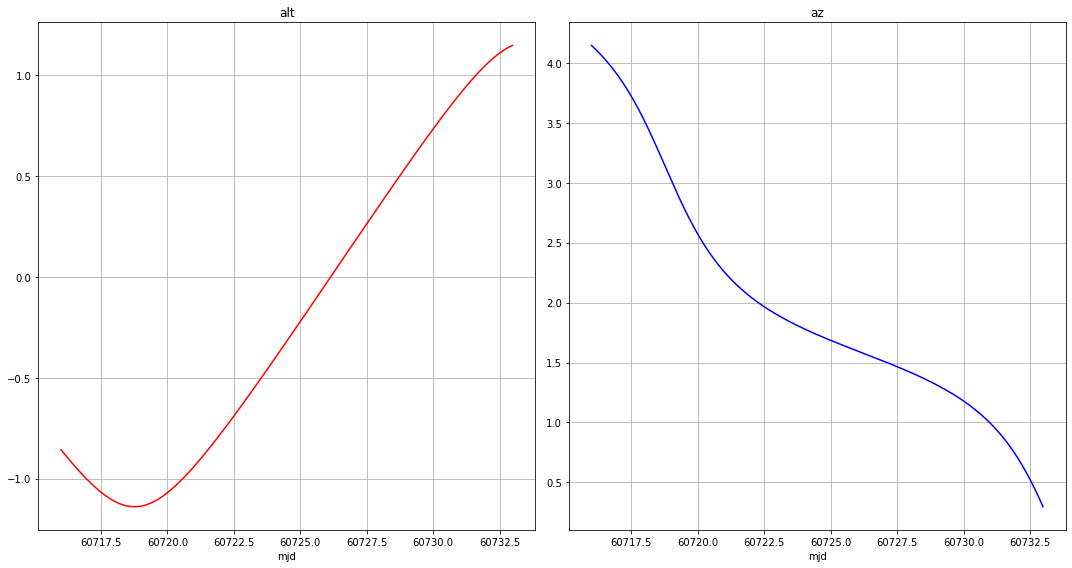

In [8]:
fig, (p1, p2) = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = [15., 8.]
plt.rcParams["figure.autolayout"] = True

p1.set_title("alt")
p1.plot(mySun.mjd, mySun.alt, color="red")
p1.grid(True)
p1.set_xlabel('mjd')


p2.set_title("az")
p2.plot(mySun.mjd, mySun.az, color="blue")
p2.grid(True)
p2.set_xlabel('mjd')
# plt.title("Time interval: "+interval)
plt.show()


---

Note that the time unit for "hours" is still the same as for other values, in the original case it's 15 min intervals, which is 0.25 hrs

In [7]:
alt = mySun.alt
mjd = mySun.mjd
az  = mySun.az
hrs = mySun.hrsFromSunrise
print(hrs[0:100]) # test printout

[-243.5  -243.25 -243.   -242.75 -242.5  -242.25 -242.   -241.75 -241.5
 -241.25 -241.   -240.75 -240.5  -240.25 -240.   -239.75 -239.5  -239.25
 -239.   -238.75 -238.5  -238.25 -238.   -237.75 -237.5  -237.25 -237.
 -236.75 -236.5  -236.25 -236.   -235.75 -235.5  -235.25 -235.   -234.75
 -234.5  -234.25 -234.   -233.75 -233.5  -233.25 -233.   -232.75 -232.5
 -232.25 -232.   -231.75 -231.5  -231.25 -231.   -230.75 -230.5  -230.25
 -230.   -229.75 -229.5  -229.25 -229.   -228.75 -228.5  -228.25 -228.
 -227.75 -227.5  -227.25 -227.   -226.75 -226.5  -226.25 -226.   -225.75
 -225.5  -225.25 -225.   -224.75 -224.5  -224.25 -224.   -223.75 -223.5
 -223.25 -223.   -222.75 -222.5  -222.25 -222.   -221.75 -221.5  -221.25
 -221.   -220.75 -220.5  -220.25 -220.   -219.75 -219.5  -219.25 -219.
 -218.75]


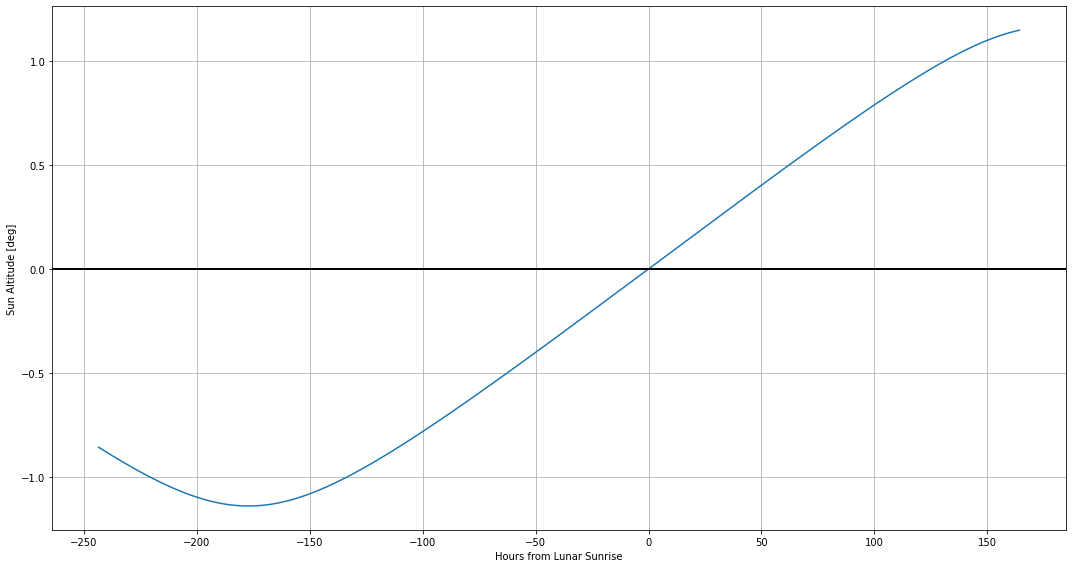

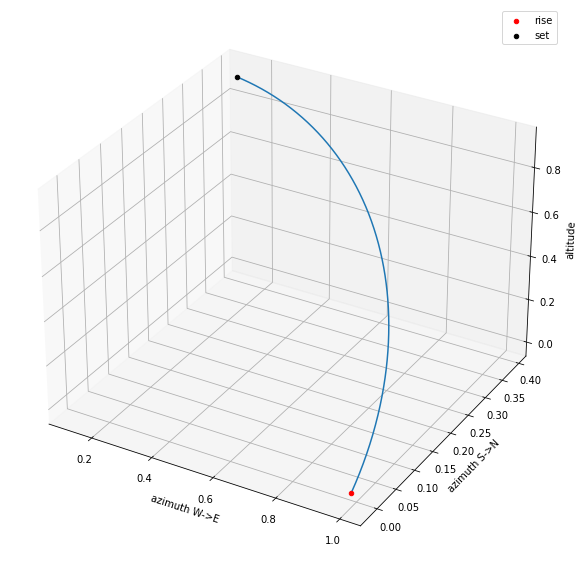

In [9]:

iMidnight       = np.argmin(alt)
iNoon           = np.argmax(alt)
iSundown1       = np.argmin(np.abs(alt[:iMidnight]))
iSunrise        = np.argmin(np.abs(alt[iMidnight:])) + iMidnight
iSundown2       = np.argmin(abs(alt[iNoon:])) + iNoon
hoursFromSunset = (mjd - mjd[iSundown1])*24

t_inc = 0.25 # Varies! But approx 0.25hrs ticks

alt_sun_top     = np.asarray(alt)+0.265
iSuntoprise     = np.argmin(np.abs(alt_sun_top[iMidnight:iNoon])) + iMidnight
iSuntopdown2    = np.argmin(abs(alt_sun_top[iNoon:])) + iNoon

# plot altitude through the cycle
plt.plot(hrs, alt, label='Alt')
plt.axhline(0, c='k', lw=2)
plt.grid(True)
plt.xlabel("Hours from Lunar Sunrise")
plt.ylabel("Sun Altitude [deg]")

# plot track of sun in 3D during 1 lunar day
plt.figure()
ax = plt.axes(projection='3d')
# day_mask = alt > 0
day_mask = [False]*len(alt) | (alt>0)
for i in range(len(day_mask)):
    if (i<iMidnight):
        day_mask[i] = False

# sun = altaz2xyz(alt, az)
sunDay = altaz2xyz(alt, az)[day_mask]

ax.plot3D(sunDay[:,0],sunDay[:,1],sunDay[:,2])
ax.scatter3D(sunDay[0,0],sunDay[0,1],sunDay[0,2], c='r', label='rise')
ax.scatter3D(sunDay[-1,0],sunDay[-1,1],sunDay[-1,2], c='k', label='set')

ax.set_xlabel('azimuth W->E')
ax.set_ylabel('azimuth S->N')
ax.set_zlabel('altitude')
ax.legend()


In [ ]:
from scipy.interpolate import interp1d

plt.plot(hrs,   alt, color="red",    label="Alt")
plt.xlim(-10, 360)
plt.grid(True)
plt.title("Alt vs Hours to sunrise")


#Lunar surface temperature data
# day_hrs = PVProjArea()[0]
hrs_per_lunar_day = 2551443/3600
temp_data = np.loadtxt("../reference/lunarTemperature30degDiviner.txt", delimiter=',') #Data starts at midnight!
time_hrs=(temp_data[:,0]-6)/24*hrs_per_lunar_day; temp=temp_data[:,1] #-6hrs to shift to hours from sunrise
temp_fit = interp1d(time_hrs,temp,kind='cubic')

print(f'''Data array: {temp_data.size}, hours per lunar day: {hrs_per_lunar_day}, t_inc: {t_inc}''')

# Interpolate temp data over daylight hours with same spacing as day_hrs
# Edge pad to length of day_hrs so array size/time increments match
# Power outside daylight hours will be zero'd by PVProjArea func, so thermal eff value meaningless outside daylight
time_day = np.arange(0,hrs_per_lunar_day/2,t_inc) 
#temp_matched = np.pad(temp_fit(time_day),(iSunrise+1,len(day_hrs)-iSundown2+2), mode='edge') 
# Copy end of day temps to previous day
#temp_matched[:iSundown1] = temp_matched[(iSundown2-iSundown1):iSundown2]

# plt.plot(hrs,temp,'o', label='Temp Data')
# plt.plot(time_day, temp_fit(time_day), '-', label='Fit for Daytime')
# plt.plot(day_hrs, temp_matched, '--', label='Padded Fit')
# plt.legend()
# plt.xlabel('Hours from Lunar Dawn'); plt.ylabel("Temperature [K]")
# plt.title("Lunar Surface Temperature")

